# Chapter 7 : 신경망 · 딥러닝

딥러닝 : 머신러닝(기계 학습)의 한 방법이며, 신경망 모델이라고 불리는 뇌의 신경 네트워크에서 힌트를 얻은 알고리즘입니다. 그 중에서 특히 층을 많이 활용한 모델이 '딥러닝' 입니다.

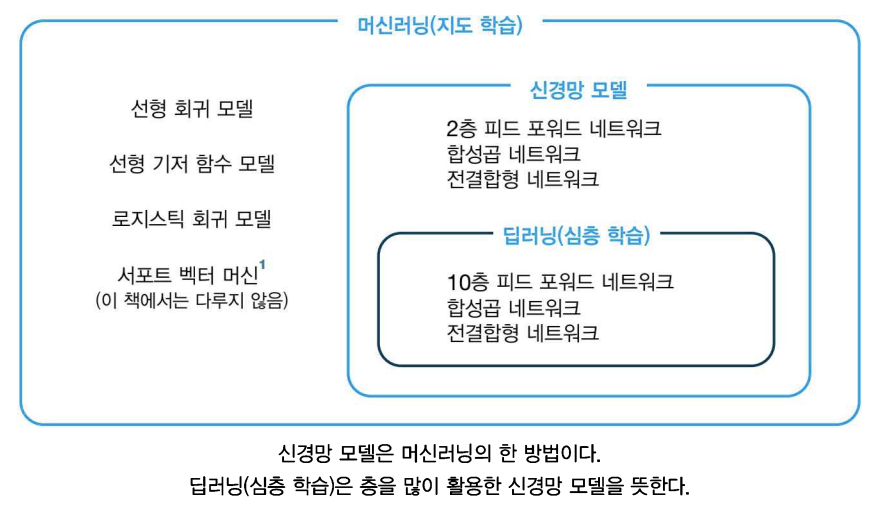


딥러닝은 심층 신경망(Deep Neural Network)라고도 합니다. 즉, '깊은 층으로 이루어진 신경망 모델'이라는 뜻입니다.


## 7.1 뉴런 모델

신경망모델은 뇌의 신경세포에서 힌드를 얻어 만든 '뉴런 모델' 단위를 통해 구축됩니다.

### 7.1.1 신경 세포

신경 세포는 축삭이라는 케이블을 가지고 있고 축삭의 시냅스라는 인터페이스를 이용해 전기적 펄스를 다른 신경 세포에 전달합니다.

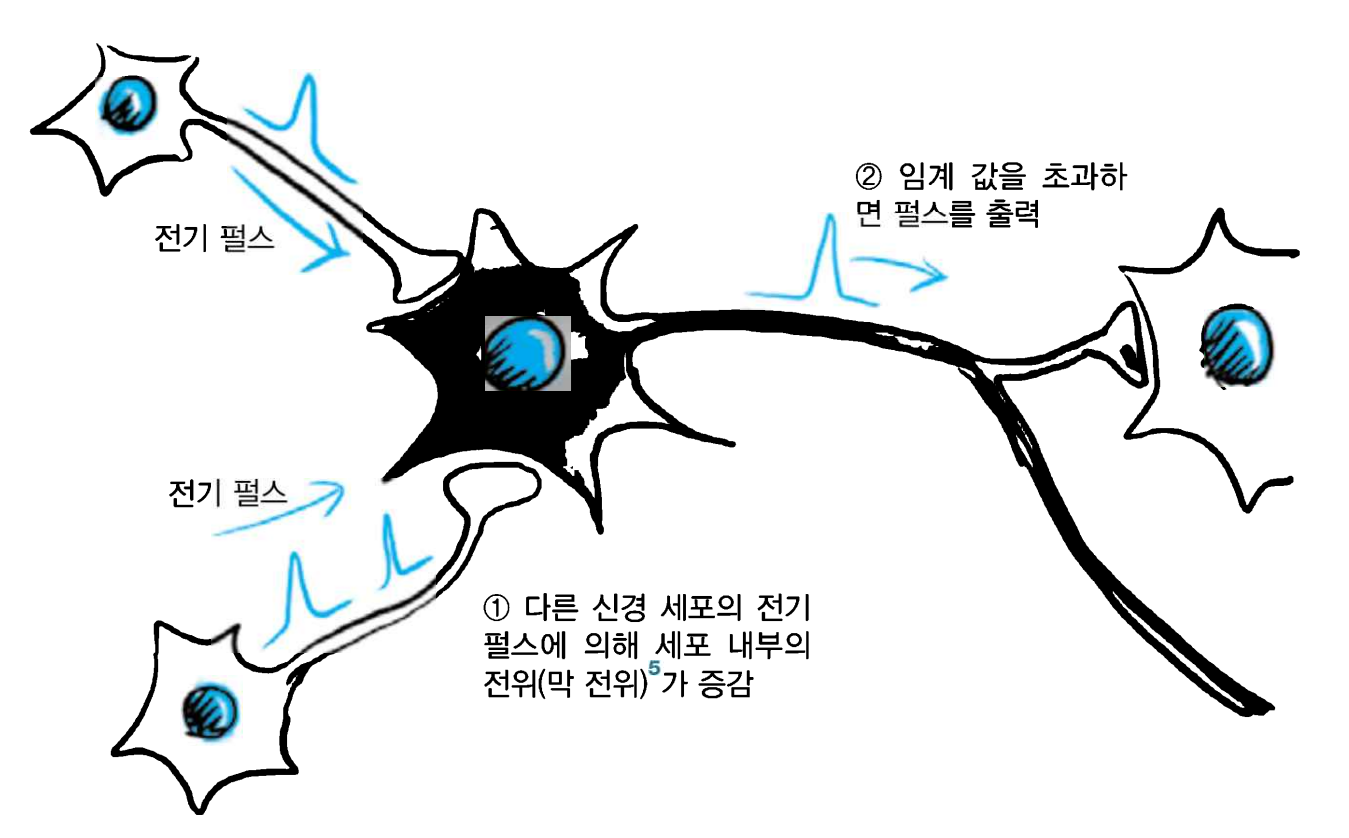

다른 세포에서 전기적 펄스를 받으면 신경세포는 입력을 받는 시냅스의 전달 강도에 따라 전위가 얼마나 오를지, 얼마나 내릴지 정해집니다.

또한 전위가 일정한 값을 초과하면 그 신경세포는 전기적인 펄스를 발산하고 펄스는 축삭을 타고 다음 신경세포로 전달됩니다.

인간은 이러한 신경 세포 간의 시냅스 전달 강도의 변화를 통해 언어를 배우거나, 자전거에 타는 법 등을 시행착오를 통해 배울 수 있습니다.

## 7.1.2 뉴런 모델

이러한 신경세포의 움직임을 단순화한 수학 모델로 만든 것이 뉴런 모델이라고 합니다.

아래 그림에선 뉴런에 2개의 입력 $x = (x_0, x_1)$가 들어오는 것을 가정합니다.

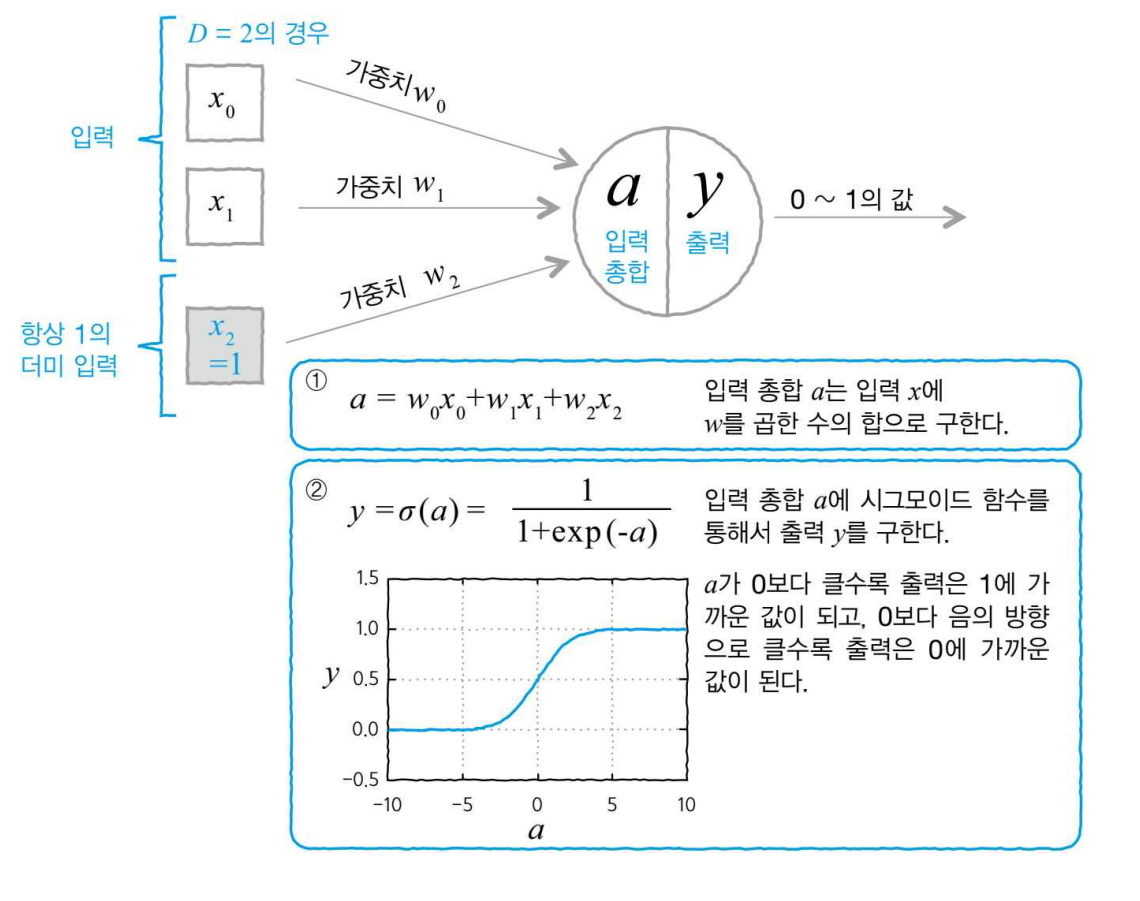

입력 값은 실수 값 $x_0, x_1$, 각각의 입력에 대한 시냅스 전달 강도를 $w_0, w_1$로 하고, 입력값 $x_2$를 1로 받는 바이어스 항의 가중치 $w_2$를 각각 곱하여 입력 총합 a로 합니다

$a = w_0x_0 + w_1x_1 + w_2x_2$

이를 시그마를 이용하여 정리하면

$a = \sum_{i=0}^{2} w_ix_i$

또한 입력 총합 a를 시그모이드 함수에 넣어 출력값 y를 만듭니다.

$y = \frac{1}{1+exp(-a)}$

이때 y는 발화빈도를 나타내고 0부터 1사이의 연속된 값을 가집니다.

입력 총합 a가 0인 경우에는 발화정도가 0.5가 되는데 이 때의 입력 공간 $(w_0, w_1)$을 직선으로 나누어 한 쪽은 0~0.5의 값을, 나머지 한 쪽은0.5~1의 값을 할당하는 기능을 갖습니다.

같은 논리로 입력 차수가 D인 경우에는 D-1차원 평면에서 출력값 y의 값이 0.5인 결정 경계를 기준으로 2개로 나뉩니다. 이 경우의 목적 함수는 평균 교차 엔트로피 오차입니다.


## 7.2 신경망 모델

###7.2.1 2층 피드 포워드 신경망

뉴런 모델은 입력 공간을 선으로 나누는 단순한 기능을 가지지만, 이를 많이 조합하여 강력한 힘을 발휘합니다.

이러한 뉴런의 집합체 모델을 신경망 모델이라고 합니다.

신경망엔 다양한 구조와 기능이 있지만 여기서는 신호가 한 방향으로만 흐르는 '피드 포워드 신경망'에 대해서 설명해보겠습니다.

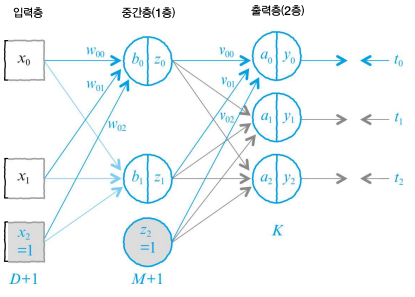

이 책에서는 비숍의 책을 모방해 입력층을 제외하여 2층 피드 포워드 신경망이라고 하고 있습니다.

또한 회색으로 표현된 부분은 바이어스항이므로 제외한 입력층의 개수가 2개이기 때문에 2차원의 입력이라고 할 수 있습니다.

이 신경망은 2차원에서 주어진 수치를 3개의 카테고리로 분류하는데, 출력층의 출력값 $y_i(i = 0, 1, 2)$가 각각의 카테고리에 속하는 확률을 나타냅니다.

중간층 네트워크를 수식으로 나타내면

$b_j = \sum_{i=0}^{2}w_{ji}x_i$

로 나타낼 수 있는데 가중치$w_{ji}$의 인덱스는 수식에선 '왼쪽 방향'으로 표기되므로 i인덱스에서 j인덱스로 향한다고 생각하면 된다. 이러면 입력 총합의 수식에서 동일한 인덱스가 나란히 줄 서는 법칙이 생기고, 행렬 표기에 대응되는 이점이 있습니다.

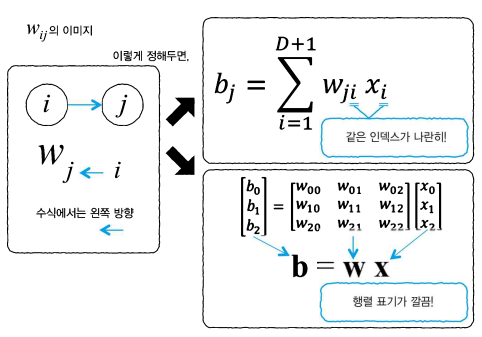

이때 나온 입력 총합 값을 시그모이드 함수를 통해 중간층 뉴런의 출력값 $z_j$를 얻습니다.

$z_j = h(b_j)$

이 때, h()는 출력을 결정하는 활성화함수로 여기서는 시그모이드 함수 σ()로 가정합니다.

마지막으로 출력층 네트워크는 중간층 뉴런의 출력 $z_j$와 출력층 k번째 뉴런의 가중치를 $v_{kj}$로 나타내어 입력 총합을 나타낼 수 있습니다.

$a_k = \sum_{i=0}^{2}w_{kj}x_j$

$z_2$의 값은 바이어스 항을 합에 포함시키는 역할을 한다.

출력층의 출력 $y_k$은 각 입력 총합 값을 소프트맥스 함수를 통해 구합니다.

$y_k = \frac{exp(a_k)}{u}$

결과적으로 입력 차원을 D, 중간층 뉴런의 수를 M, 출력 차원을 K로 한 경우 각 식을 일반화하면 이런 식으로 나옵니다.

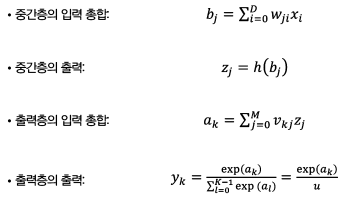

### 2층 피드 포워드 신경망의 구현

6.3.1절에서 3클래스 분류에 사용한 데이터를 이용하여 2층 피드 포워드 신경망을 구현해보겠습니다.

In [25]:
import numpy as np
# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 # 분포의 수
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0의 범위, 표시용
X_range1 = [-3, 3] # X1의 범위, 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k] #boolean 값과, k 값의 조합

<ipython-input-25-613ab5de5f82>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k] #boolean 값과, k 값의 조합


In [26]:
# -------- 분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]


# -------- 데이터를 'class_data.npz'에 저장
np.savez('class_data.npz', X_train=X_train, T_train=T_train,
         X_test=X_test, T_test=T_test,
         X_range0=X_range0, X_range1=X_range1)

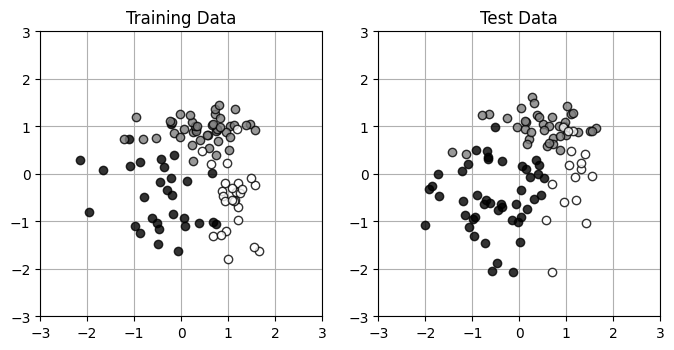

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터를 그리기 ------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none',
                 marker='o', markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)


# 메인 ------------------------------------
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

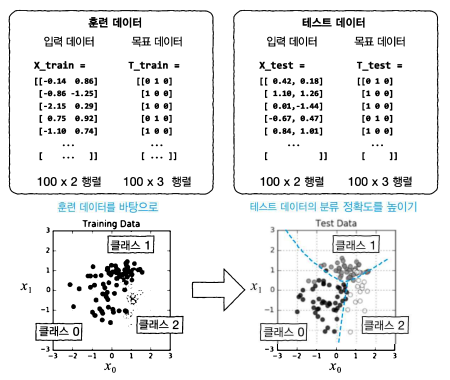

위에 작성한 코드는 데이터를 생성, 라벨링 하고 이를 절반씩 훈련데이터, 테스트 데이터로 나누고 저장한 후에 이를 시각화하는 코드입니다.

이후에는 FNN이라는 2층 피드 포워드 신경망을 정의하는 네트워크를 만들어 3클래스 분류문제를 풀어보겠습니다.

FNN은 입력 x를 받아 y를 출력합니다. 또한 입력 x는 D차원 벡터이며, 출력 y는 K차원 벡터입니다 당분간은 D = 2, K = 3으로 생각하여 문제를 해결하겠습니다.

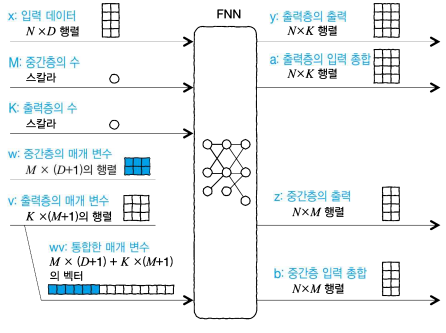



In [28]:
# 시그모이드 함수 ------------------------
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y


# 네트워크 ------------------------
def FNN(wv, M, K, x):
    N, D = x.shape # 입력 차원
    w = wv[:M * (D + 1)] # 중간층 뉴런의 가중치
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):] # 출력층 뉴런의 가중치

    v = v.reshape((K, M + 1))
    b = np.zeros((N, M + 1)) # 중간층 뉴런의 입력 총합
    z = np.zeros((N, M + 1)) # 중간층 뉴런의 출력
    a = np.zeros((N, K)) # 출력층 뉴런의 입력 총합
    y = np.zeros((N, K)) # 출력층 뉴런의 출력
    for n in range(N):
        # 중간층의 계산
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # (A)
            z[n, m] = Sigmoid(b[n, m])
        # 출력층의 계산
        z[n, M] = 1 # 더미 뉴런
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b


# test ---
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

이 때 가중치 벡터 WV의 개수는 M(중간층 뉴런 개수) = 2, K(출력층 뉴런 개수) = 3 로 하여 2 X 3 + 3 X 3 = 15개입니다 입력의 개수에 바이어스항이 추가되어 2가 아닌 3으로 곱하게 됩니다. X_train에서 데이터 2개만 넣었기 떄문에 모든 행렬은 두 줄이 됩니다.

(A)에서 설명하는 함수 np.r_[A, B]는 행렬을 옆으로 연결시키는 명령어로 위의 경우에서는 입력값에 바이어스항을 추가하는 용도로 사용되었습니다.

### 7.2.3 수치 미분법

2층 피드 포워드 네트워크에서 3분류 문제를 생각했을 때, 분류 문제이므로 오차함수는 평균 교차 엔트로피 오차를 사용합니다.

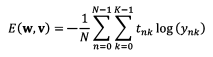

이러한 평균 교차 엔트로피 오차를 CE_FNN함수로 구현합니다.

In [29]:
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    return ce


# test ---
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

이때 CE_FNN은 FNN이 x에 대한 y를 출력하고 y를 목표 데이터의 정답값 t와 비교하여 크로스 엔트로피를 계산하는 함수입니다.

이 때 경사 하강법을 적용하려면 오차 함수를 매개 변수로 편미분한 식이 필요하지만 속도에 신경쓰지 않는다면 간단히 수치적 미분을 통해 그래디언트 값을 구할 수 있습니다.

이 때 오차 함수 $E(w)$를 상정하여 $w$는 $w^*$라는 값을 가진다고 가정하였을 때 $w^*$지점의 조금 앞의 지점 $w^*-ϵ$(ϵ은 0.001과 같이 충분히 작은 지점)의 오차 함수 값$E(w^*-ϵ)$과 조금 뒤의 지점 $w^*-ϵ$의 오차함수 값$E(w^*+ϵ)$을 통해 $w^*$의 지점의 기울기를 근사할 수 있습니다.

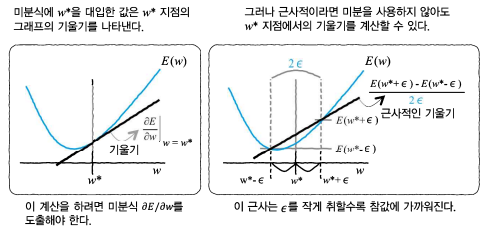

매개변수가 $w_0, w_1, w_2$ 3개라고 했을 때 $w_0^*, w_1^*, w_2^*$ 점에서 $E(w_0, w_1, w_2)$의 기울기를 알려면 각각의 매개변수를 변수, 나머지는 상수로 두고 편미분을 3번 한 결과를 통해 기울기를 근사할 수 있습니다.

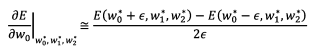

다음 코드는 CE_FNN의 수치 미분을 출력하는 함수 dCE_FNN_num의 코드입니다.

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


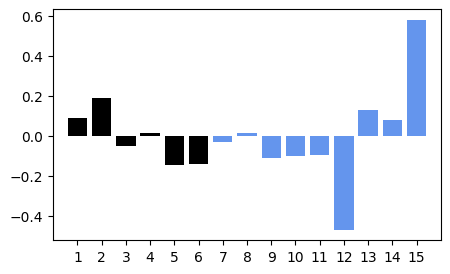

In [30]:
# - 수치 미분 ------------------
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv


#--dVW의 표시 ------------------
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)


#-test----
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

이 때, 왼쪽의 검정색 막대그래프는 W, 파란 색은 V의 편미분 값을 나타냅니다.

### 7.2.4 수치 미분법에 의한 경사 하강법

수치 미분을 사용해 분류 문제를 경사 하강법으로 푸는 함수를 Fit_FNN_num을 함수명으로 사용하여 작성해 보았습니다.

지금까지와 다른 부분으로는 가중치의 초기값으로 wv_init을 넣고 학습된 매개변수인 wvt를 출력한다는 점입니다.

또한 학습에는 사용되지 않는 테스트 데이터를 이용해 오차를 계산하고 오버 피팅이 일어나지 않는지 확인합니다.

마지막으로 학습단계 수 n을 이용하여 n번 동안 학습하며 학습 상수 alpha를 통해 계산된 기울기 값을 얼만큼 적용할 것인지 판단합니다.

In [31]:
import time


# 수치 미분을 사용한 경사 하강법 -------
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n): # (A)
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000 # (B) 학습 단계
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:172.371 sec


학습이 끝나면 이제 학습 오차와, 가중치가 학습 단계 수 만큼 생성되는데 이를 그림으로 그리는 코드를 작성해보겠습니다.

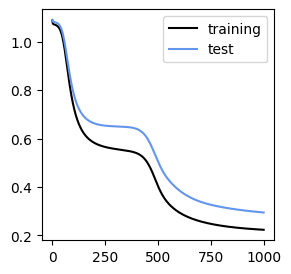

In [32]:
# 학습 오차의 표시 ---------------------------
plt.figure(1, figsize = (3, 3))
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test, 'cornflowerblue', label = 'test')
plt.legend()
plt.show()

훈련 데이터의 오차가 단조롭게 감소하여 일정한 값으로 수렴하고 있음으로 알 수 있습니다.
테스트 데이터의 오차도 훈련 데이터와 비슷하게 떨어졌기 때문에 오버 피팅은 일어나지 않았다고 볼 수 있습니다.

400단계 부근에서 학습이 수렴한 것처럼 보였지만 급격히 학습이 진행되는 상황은 가중치의 변화를 표현한 그래프에서 단서를 찾을 수 있습니다.

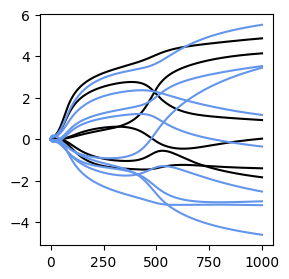

In [33]:
# 가중치의 시간 변화의 표시 ---------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

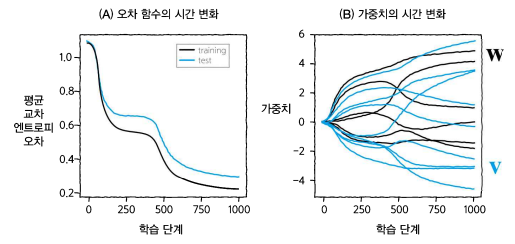

400단계 부근에서 각각의 가중치 그래프가 교차하는데 이는 가중치를 갱신하는 방향, 즉 오차 함수의 기울기 방향이 변화하는 것을 의미합니다. 이는 가중치가 안장점이라는 지점 근처를 통과했기 때문일지도 모릅니다.

현재 실습하는 코드는 가중치 공간이 15차원이라 그릴 수 없지만 위의 그림은 매개변수가 2개라고 가정하고 안장점을 그린 이미지입니다. 위의 그림에서 계곡의 가운데로 내려갈 수록 학습이 느려지다가 어느 정도 진행 되면, 점차 산의 기울기를 따라 방향이 변화하고 갱신이 가속화되는 것을 볼 수 있습니다.

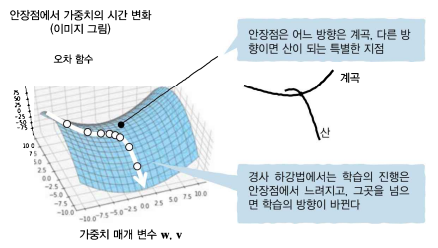

첫 코드에서 데이터를 시각화해 보여줬는데 show_FNN함수를 통해 각각의 카테고리에서 0.5, 0.9 이상의 출력을 얻을 수 있는 영역을 등고선으로 나타내보겠습니다.

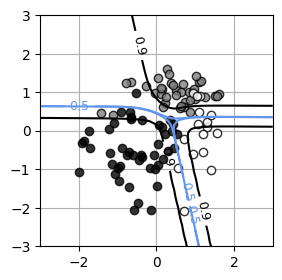

In [34]:
# 경계선 표시 함수 --------------------------
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn , 'F')]
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)


# 경계선 표시 --------------------------
plt.figure(1, figsize=(3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

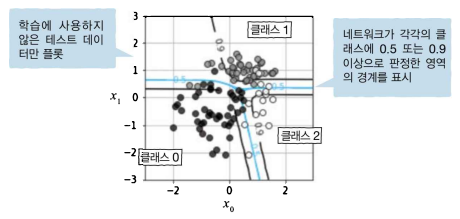

### 7.2.5 오차 역전파법

오차 역전파 : 네트워크의 출력값과 정답값을 비교하여 도출한 오차 정보를 사용하여 피드 포워드 신경망의 진행방향과 반대로 가중치를 갱신하는 방법

사실 오차 역전파법은 경사 하강법입니다. 경사 하강법을 피드포워드 네트워크에 적용하면 오차 역전파법이 자연스럽게 도출됩니다.

경사 하강법의 적용을 위해 오차 함수를 매개 변수로 편미분합니다. 클래스 분류를 위해 오차 함수는 평균 교차 엔트로피 오차를 사용합니다.

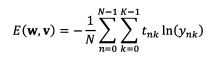

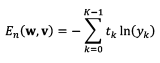

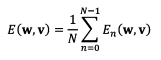

첫 번째 식은 평균 교차 엔트로피 오차의 식이며 아래 두 식은 이를 풀어서 설명한 것입니다.

두 번째 식은 하나의 데이터에 해당하는 상호 엔트로피 오차 $E_n$를 구하는 식입니다.

마지막 식을 통해 N개의 모든 상호 엔트로피의 평균이 $E(w, v)$와 같다는 것을 알 수 있습니다.

이를 통해 각 데이터의 상호 엔트로피 오차를 미분한 값의 평균이 본래 목적인 $\frac{∂ E}{∂w_{ji}}$임을 알 수 있다.

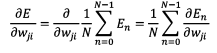

### 7.2.6 $\frac{∂E}{∂v_{kj}}$를 구하기

연쇄 법칙을 이용해 $\frac{∂E}{∂v_{kj}}$를 $E_n$을 k번째 입력 총합으로 미분하고, k번째 입력 총합 가중치를 $v_{kj}$로 미분한 곱으로 나눕니다.

[식 1]

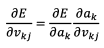



[식 1]에서 $E$는 $E_n$과 같습니다. k = 0인 경우에서 위의 상호 엔트로피 오차를 사용하여 t, y에서만 사용 가능한 [식 2]를 작성할 수 있습니다.

[식 2]

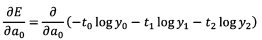

여기에서 $t_K$는 입력에 대한 정답 신호이기 때문에 상수로 가정하고 $y_K$는 $a_0$에 대한 함수로 식을 확장하면 [식 3]이 나옵니다.

[식 3]

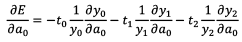

$y_K$는 a의 소프트맥스 함수입니다. 소프트맥스 함수는 $\frac{∂y_i}{∂a_j}$일 때 i와 j가 같을 경우 미분값이 $y_j(1-y_i)$ 이고 i와 j가 다를 경우 미분값이 $-y_jy_i$가 됩니다. 이를통해 [식 3의] 1, 2, 3항을 [식 4], [식 5], [식 6]으로 표현할 수 있습니다.

[식 4]

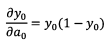

[식 5]

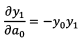

[식 6]

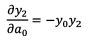

따라서 [식 4], [식 5], [식 6]의 결과를 [식 3]에 대입하게 되면 [식 7]이 됩니다.

[식 7]

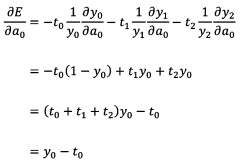

방금까지는 k가 0일 경우로 문제를 해결했으므로 k가 1, 2일 때도 같은 방식으로 [식 8]을 만들고 이를 일반화하여 [식 9]를 도출할 수 있습니다.

[식 8]

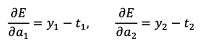

[식 9]

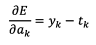

$\frac{∂E}{∂a_k}$는 출력층(2층)의 오차를 나타내므로 [식 10]과 같이 나타납니다.

[식 10]

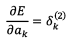

위의 예시는 오차 함수에 크로스 엔트로피를 사용해서 얻어진 것이고, 만약 오차 함수에 제곱 오차를 사용하면 [식 11]을 얻을 수 있습니다.

[식 11]

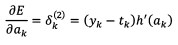

이제 [식 1]의 뒷 부분에서 k = 0인 경우를 생각하면 $a_0$는 [식 12]와 같습니다.

[식 12]

image.png

이 때 $a_0$를 가중치 값$v_{00}, v_{01}, v_{02}$로 미분하면 [식 13]이 나오고 이를 일반화하면 [식 14]가 나옵니다.

[식 13]

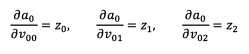

[식 14]

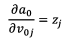

또한 k = 1, k = 2일 때에도 같은 방식으로 하면 [식 15]가 나옵니다.

[식 15]

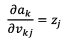

[식 15]를 [식 10]과 곱하여 [식 1]을 변형한 결과가 [식 16]입니다.

[식 16]

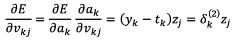

따라서 $v_{kj}$의 갱신 규칙은 [식 17]과 같습니다.

쉽게 이야기해서 경사하강법에서 갱신된 $v_{kj}$는 기존 $v_{kj}$에서 결합의 앞에 생긴 오차와 기존 입력값에 학습 상수를 곱한 값을 빼는 것입니다.


[식 17]

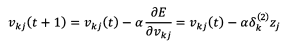

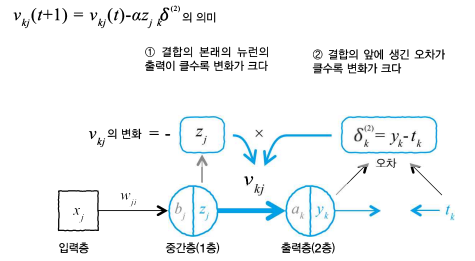

### 7.2.7 $\frac{∂E_n}{∂w_{ji}}$을 구하기

2층의 가중치 매개변수 $v_{ji}$의 학습을 위에서 구현했고 이젠 1층의 가중치 매개변수 $w_{ji}$의 학습 법칙을 구현해야 하는데 이것도 오차함수 $E$를 $w_{ji}$로 편미분합니다. 같은 방식으로 $\frac{∂E_n}{∂w_{ji}}$를 분해하여 [식 18]을 만듭니다.

[식 18]

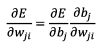

[식 10]의 도출 방법과 유사하게 [식 19]를 정의합니다.

[식 19]

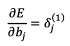

또한 [식 15]의 도출 방법과 비슷한 방식으로 [식 20]을 정의합니다.

[식 20]

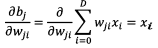

따라서 $w_{ji}$의 갱신규칙은 [식 21]과 같습니다.

결국 $w_{ji}$도 $v_{ji}$와 마찬가지로 결합 앞의 오차와, 결합 전의 입력에 비례하여 변화한다는 것을 알 수 있었습니다.

[식 21]

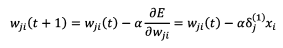

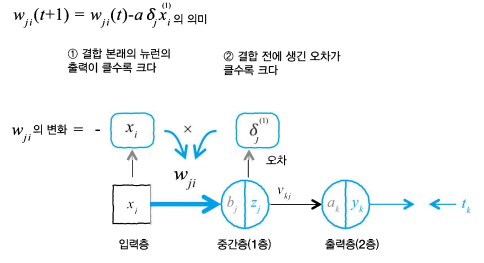

하지만 아직 $δ_k^{(1)}$(중간층의 오차)가 무엇인지를 아직 알아보지 않았으므로 편미분 연쇄 규칙을 사용하여 [식 22]를 만듭니다.

[식 22]

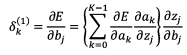

분해한 첫 번째 $\frac{∂E}{∂a_k}$는 [식 10]의 결과를 통해 $δ_k^{(2)}$로 나타낼 수 있고, 두 번째는 $\frac{∂a_k}{∂z_j}$는 [식 23]과 같습니다.

[식 23]

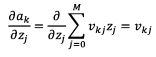

또한 세 번째 $\frac{∂z_j}{∂b_j}$는 중간층의 활성화 함수로 h()로 하면 [그림 24]와 같이 표기됩니다.

중간층의 활성화 함수는 시그모이드 함수이지만 여기에서는 일단 h()로 표시합니다.

[식 24]

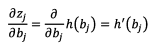

따라서 이를 전부 합치면 [식 25]가 됩니다.

[식 25]

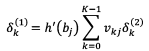

식을 그림을 통해 살펴보면 $δ_k^{(1)}$은 결국 대상의 오차인 $δ_k^{(2)}$ $v_{kj}$의 가중치로 모아 반대 방향으로 전달시켜 계산한다고 볼 수 있습니다.

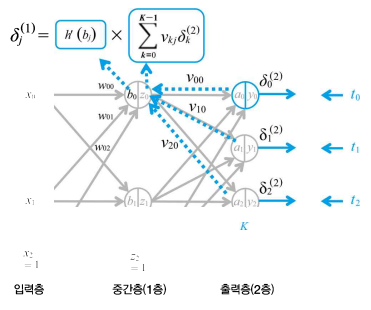

이러한 방식을 이용하면 네트워크가 늘어도 이 법칙을 사용하면 간단하게 매개 변수의 학습 법칙을 도출할 수 있습니다. 이러한 특성을 통해 피드 포워드 신경망의 경사 하강법이 오차 역전파법이라고도 불립니다.

그림으로 정리하면 아래와 같이 네 가지 단계를 통해 가중치를 갱신합니다.

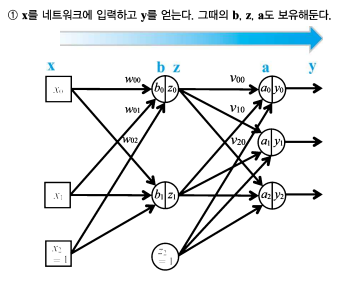

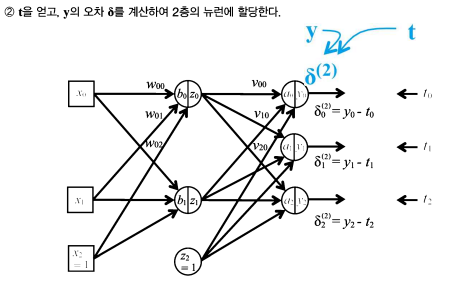

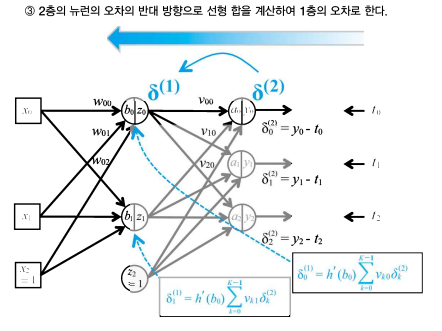

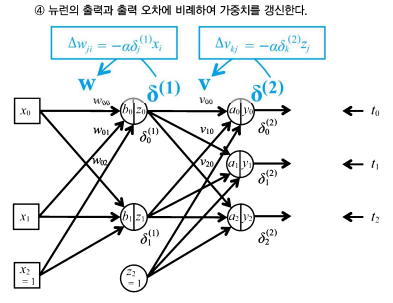

N개의 데이터가 있으므로 이러한 1부터 4까지의 절차를 N번 처리하여 학습의 1단계를 처리합니다.

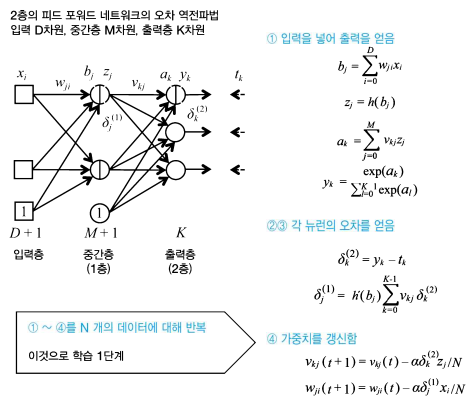

### 7.2.8 오차 역전파의 구현

오차 역전파법으로 $\frac{∂E}{∂w}$ 및 $\frac{∂E}{∂v}$를 구하는 코드를 dCE_FNN이라는 함수를 통해 나타내보겠습니다.

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


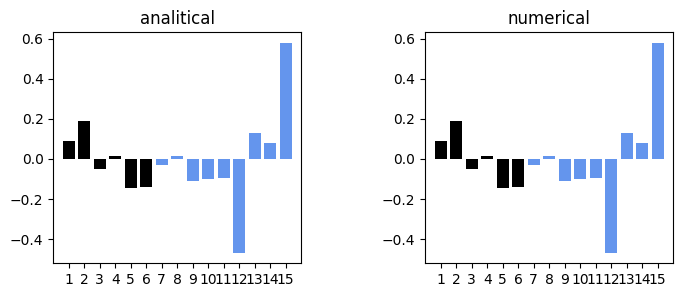

In [35]:
# -- 해석적 미분 -------------------------------------
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wv을 w와 v로 되돌림
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    # 1. x를 입력하여 y를 얻음
    y, a, z, b = FNN(wv, M, K, x)
    # 출력 변수의 준비
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)
    for n in range(N): # (A)
        # 2. 출력층의 오차를 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # 3. 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # 4. v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # 4. w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv


#------Show VW
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3],
            align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)


#-- 동작 확인
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)


dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)


dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)


plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

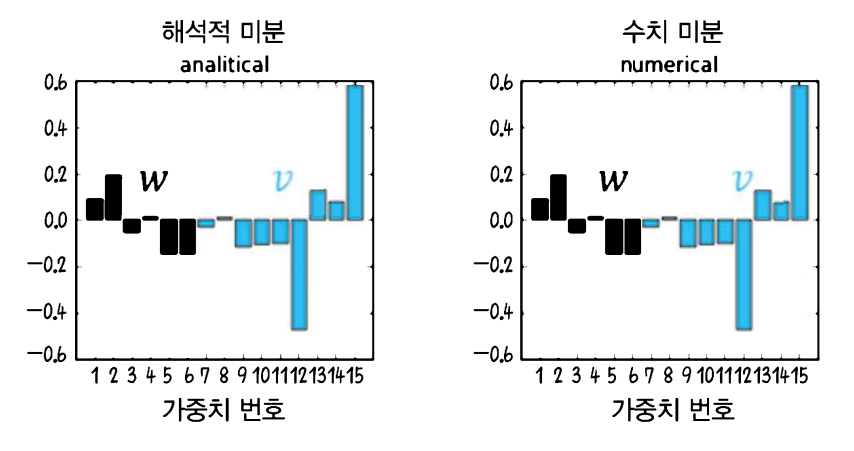

해석적 미분 값은 7.2.3절에서 계산한 수치 미분 값과 거의 일치하여 분석 미분이 제대로 계산되어 있었던 것이 확인되었습니다.

다음으로 수치 미분으로 풀어본 분류 문제를 오차 역전파법으로 다시 푸는 코드를 구현해보겠습니다.

In [36]:
import time


# 해석적 미분을 사용한 구배법 -------
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:19.992 sec


해석적 미분을 사용한 방법이 수치 미분을 이용한 경사 하강법 보다 약 8.5배 정도 빠른 것을 알 수 있습니다.

또한 마찬가지로 각 데이터를 학습할 때 마다 오차, 훈련, 테스트데이터의 학습오차를 기록하여 아래 표로 나타내었습니다.

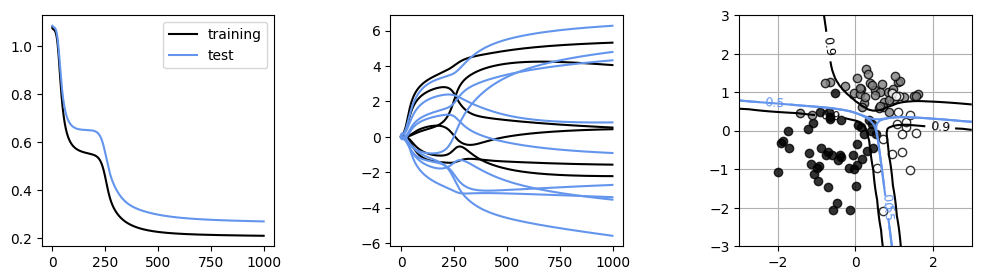

In [37]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
# 학습 오차의 표시 ---------------------------
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
# 가중치의 시간 변화 표시 ---------------------------
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

수치 미분 때와 거의 같은 결과를 얻었습니다.

수치 미분을 통항 방법은 오차 함수를 미분 하는 방식보다 느리지만 올바른 값을 정해두어, 오차 함수를 미분 할 때 오류가 없는지 검증하는 용도로 사용합니다.

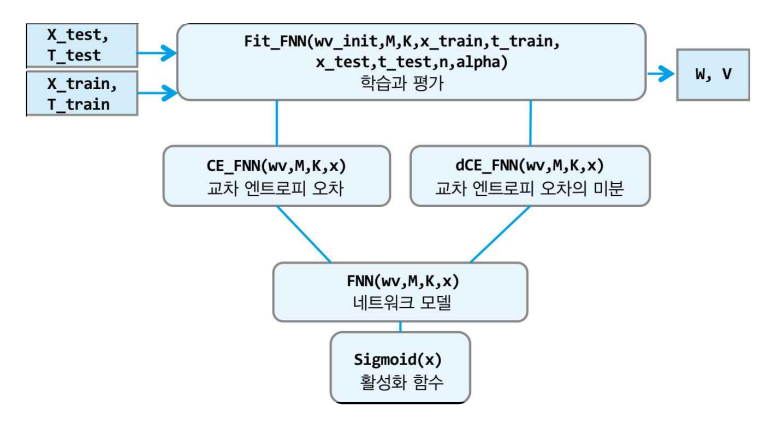

### 7.2.9 학습 후 뉴런의 특성

이 네트워크는 위에서 나타낸 등고선의 경계선을 어떻게 만들었고, 학습의 결과로 뉴런은 어떠한 성질을 획득하였는지 코드를 통해 $b_j, z_j, a_k, y_k$의 특성을 그림으로 나타내 보겠습니다.

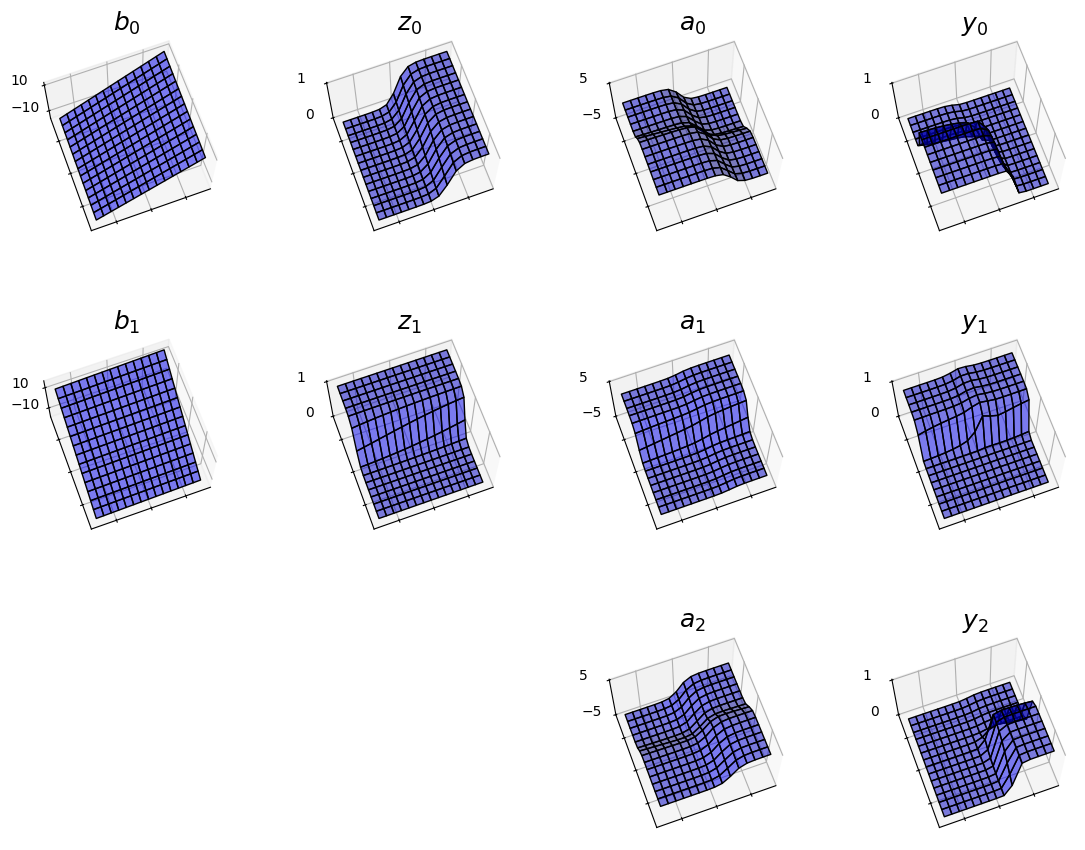

In [38]:
from mpl_toolkits.mplot3d import Axes3D


def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black',
                    rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)


M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
y, a, z, b = FNN(WV, M, K, x)


fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))


for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))


plt.show()

a는 소프트맥스 함수를 지나 0~1의 범위로 눌러 뭉게져 $y_k$가 만들어집니다. $y_0, y_1, y_2$는 각 클래스로 분류되며 모두 더하면 높이가 1인 평면이 됩니다.

## 7.3 케라스로 신경망 모델 구현

In [39]:
import tensorflow.keras
# import optimizers

In [40]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1) # (A)
import keras.optimizers #(B)
from keras.models import Sequential # (C)
from keras.layers import Dense, Activation #(D)

# 데이터 로드 -------------------------------
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']

X_test = outfile['X_test']
T_test = outfile['T_test']

X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']


우선 B, C, D에서 케라스 관련 라이브러리를 import합니다.

np.random.seed(1)코드로 random함수의 시드값을 설정하여 실행할 때 마다 동일한 결과를 얻을 수 있게 합니다.

다음 함수 Show_data는 이전에 정의했던 데이터를 함수로 그리는 함수를 재정의합니다.

In [42]:
def Show_data(x, t) :
  wk, n = t.shape
  c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
  for i in range(n) :
    plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle = 'none', marker = 'o', markeredgecolor = 'black', color = c[i], alpha = 0.8)
  plt.grid(True)

이후 코드는 2층 피드백 신경망 모델을 만들고 학습시키는 과정을 구현한 코드입니다.

In [43]:
# 난수 초기화
np.random.seed(1)

# -------- Sequential 모델 자석
model = Sequential()

model.add(Dense(2, input_dim = 2, activation = 'sigmoid', kernel_initializer = 'uniform')) # (A)
model.add(Dense(3, activation = 'softmax', kernel_initializer = 'uniform')) # (B)
sgd = keras.optimizers.SGD(learning_rate = 1.0, momentum = 0.0, nesterov = False) # (C)

model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy']) # (D)정답률로 출력

# -------- 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs = 1000, batch_size = 100, verbose = 0, validation_data = (X_test, T_test)) # (E) 모델에 학습

# -------- 모델평가
score = model.evaluate(X_test, T_test, verbose = 0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))

calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


cross entropy 0.26, accuracy 0.90
Calculation time:63.121 sec


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


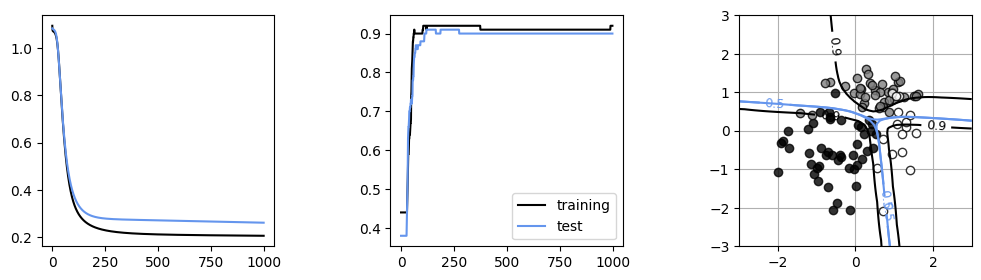

In [44]:
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace = 0.5)

# 학습 곡선 표시 --------------------------------
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label = 'training') # (A) loss 참조
plt.plot(history.history['val_loss'], 'cornflowerblue', label = 'test') # (B) val loss 참조

# 정확도 표시 --------------------------------
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label = 'training') # (C) 'acc' -> 'accuracy'
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label = 'test') # (D) 'val_acc' -> 'val_accuracy'
plt.legend()

# 경계선 표시 --------------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 1 -> 'F'
y = model.predict(x) #(E)

K = 3
for ic in range(K) :
  f = y[:, ic]
  f = f.reshape(xn, xn)
  f = f.T

  cont = plt.contour(xx0, xx1, f, levels = [0.5, 0.9], colors = ['cornflowerblue', 'black'])
  cont.clabel(fmt = '%1.1f', fontsize = 9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)

plt.show()